In [ ]:
#Smart Health Monitoring System

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
# Step 1: Data Preparation
def generate_health_dataset(num_samples=500):
    np.random.seed(42)
    data = {
        'age': np.random.randint(18, 80, num_samples),
        'bmi': np.round(np.random.uniform(18.5, 40.0, num_samples), 1),
        'heart_rate': np.random.randint(60, 100, num_samples),
        'systolic_bp': np.random.randint(90, 180, num_samples),
        'diastolic_bp': np.random.randint(60, 120, num_samples),
        'calories_burned': np.random.randint(1500, 3500, num_samples)
    }
    
    # Generate target risk_level based on simple conditions
    data['risk_level'] = np.where((data['bmi'] > 30) | (data['heart_rate'] > 90) | (data['systolic_bp'] > 140), 1, 0)
    
    return pd.DataFrame(data)

# Generate synthetic health data
health_data = generate_health_dataset()

In [13]:
# Step 2: Model Training
X = health_data.drop('risk_level', axis=1)
y = health_data['risk_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline for scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

# Predict and evaluate model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.84


In [15]:
# Step 3: Input Form for User Data
def get_user_input():
    print("Enter the following health data:")
    age = int(input("Age: "))
    bmi = float(input("BMI: "))
    heart_rate = int(input("Heart Rate (BPM): "))
    systolic_bp = int(input("Systolic Blood Pressure (mm Hg): "))
    diastolic_bp = int(input("Diastolic Blood Pressure (mm Hg): "))
    calories_burned = int(input("Calories Burned (per day): "))
    
    return pd.DataFrame({
        'age': [age],
        'bmi': [bmi],
        'heart_rate': [heart_rate],
        'systolic_bp': [systolic_bp],
        'diastolic_bp': [diastolic_bp],
        'calories_burned': [calories_burned]
    })

user_data = get_user_input()


Enter the following health data:


Age:  30
BMI:  27.5
Heart Rate (BPM):  85
Systolic Blood Pressure (mm Hg):  130
Diastolic Blood Pressure (mm Hg):  85
Calories Burned (per day):  2200


In [17]:
# Step 4: Predict Health Risk
def predict_risk(model, user_data):
    prediction = model.predict(user_data)
    return "High Risk" if prediction[0] == 1 else "Low Risk"

risk_level = predict_risk(pipeline, user_data)
print("Predicted Health Risk:", risk_level)


Predicted Health Risk: High Risk



Available metrics for visualization: 'heart_rate', 'calories_burned', 'bmi_vs_bp', 'age_distribution', 'bp_over_time'
Type 'exit' to end the program.


Enter the metric you want to visualize or type 'exit' to quit:  bp_over_time


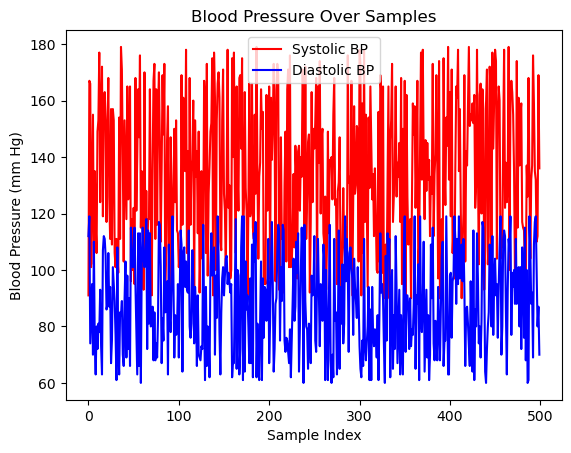


Available metrics for visualization: 'heart_rate', 'calories_burned', 'bmi_vs_bp', 'age_distribution', 'bp_over_time'
Type 'exit' to end the program.


Enter the metric you want to visualize or type 'exit' to quit:  age_distribution


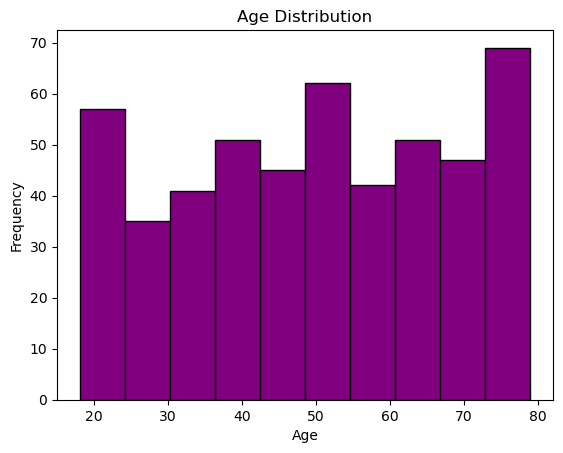


Available metrics for visualization: 'heart_rate', 'calories_burned', 'bmi_vs_bp', 'age_distribution', 'bp_over_time'
Type 'exit' to end the program.


Enter the metric you want to visualize or type 'exit' to quit:  heart_rate


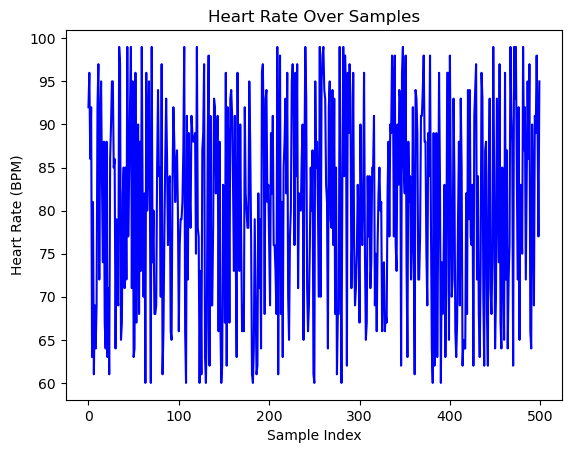


Available metrics for visualization: 'heart_rate', 'calories_burned', 'bmi_vs_bp', 'age_distribution', 'bp_over_time'
Type 'exit' to end the program.


Enter the metric you want to visualize or type 'exit' to quit:  calories_burned


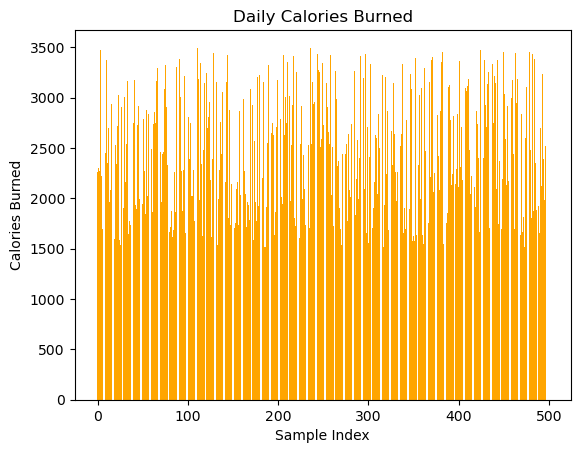


Available metrics for visualization: 'heart_rate', 'calories_burned', 'bmi_vs_bp', 'age_distribution', 'bp_over_time'
Type 'exit' to end the program.


Enter the metric you want to visualize or type 'exit' to quit:  exit


Exiting the program.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5: Data Visualization based on User-Specified Metric
def visualize_data(health_data, metric):
    if metric == "heart_rate":
        plt.plot(health_data['heart_rate'], color='blue')
        plt.title("Heart Rate Over Samples")
        plt.xlabel("Sample Index")
        plt.ylabel("Heart Rate (BPM)")
    
    elif metric == "calories_burned":
        plt.bar(health_data.index, health_data['calories_burned'], color='orange')
        plt.title("Daily Calories Burned")
        plt.xlabel("Sample Index")
        plt.ylabel("Calories Burned")
    
    elif metric == "bmi_vs_bp":
        sns.scatterplot(x='bmi', y='systolic_bp', hue='risk_level', data=health_data, palette='coolwarm')
        plt.title("BMI vs Systolic Blood Pressure")
        plt.xlabel("BMI")
        plt.ylabel("Systolic BP")
    
    elif metric == "age_distribution":
        plt.hist(health_data['age'], bins=10, color='purple', edgecolor='black')
        plt.title("Age Distribution")
        plt.xlabel("Age")
        plt.ylabel("Frequency")
    
    elif metric == "bp_over_time":
        plt.plot(health_data['systolic_bp'], label="Systolic BP", color='red')
        plt.plot(health_data['diastolic_bp'], label="Diastolic BP", color='blue')
        plt.title("Blood Pressure Over Samples")
        plt.xlabel("Sample Index")
        plt.ylabel("Blood Pressure (mm Hg)")
        plt.legend()
    
    else:
        print("Invalid metric. Choose from 'heart_rate', 'calories_burned', 'bmi_vs_bp', 'age_distribution', 'bp_over_time'.")
        return
    
    plt.show()

# Loop to allow multiple visualizations
while True:
    print("\nAvailable metrics for visualization: 'heart_rate', 'calories_burned', 'bmi_vs_bp', 'age_distribution', 'bp_over_time'")
    print("Type 'exit' to end the program.")
    
    metric = input("Enter the metric you want to visualize or type 'exit' to quit: ").strip().lower()
    
    if metric == "exit":
        print("Exiting the program.")
        break
    else:
        visualize_data(health_data, metric)
